In [44]:
import pandas as pd

# Extracting enrolment division info and vote types data from CSV

In [45]:
df = pd.read_csv('Resources/HouseVotesCountedByDivisionDownload-20499.csv', header=1)

In [46]:
df.head()

,DivisionID,DivisionNm,StateAb,Enrolment,OrdinaryVotes,AbsentVotes,ProvisionalVotes,PrePollVotes,PostalVotes,TotalVotes,TotalPercentage
0,179,Adelaide,SA,109217,79148,6869,686,3444,8515,98662,90.34
1,197,Aston,VIC,96043,72395,3756,292,3090,9578,89111,92.78
2,198,Ballarat,VIC,110755,87377,3439,783,3118,8451,103168,93.15
3,103,Banks,NSW,104891,81420,4109,469,3395,7095,96488,91.99
4,180,Barker,SA,105600,85870,3019,245,2877,6662,98673,93.44


# Transforming the data to look at the vote types of the 2016 federal election

In [47]:
df.columns

Index(['DivisionID', 'DivisionNm', 'StateAb', 'Enrolment', 'OrdinaryVotes',
       'AbsentVotes', 'ProvisionalVotes', 'PrePollVotes', 'PostalVotes',
       'TotalVotes', 'TotalPercentage'],
      dtype='object')

In [48]:
df.dtypes

DivisionID            int64
DivisionNm           object
StateAb              object
Enrolment             int64
OrdinaryVotes         int64
AbsentVotes           int64
ProvisionalVotes      int64
PrePollVotes          int64
PostalVotes           int64
TotalVotes            int64
TotalPercentage     float64
dtype: object

In [49]:
# checking for duplicates
df['DivisionID'].is_unique

True

In [50]:
len(df)

150

In [51]:
# dropping any na values 
df = df.dropna()
len(df)

150

In [52]:
# columns we want to keep
columns = ['DivisionID', 'OrdinaryVotes', 'AbsentVotes', 'ProvisionalVotes','PrePollVotes','PostalVotes','TotalVotes']
votetypes_df = df[columns]
votetypes_df

,DivisionID,OrdinaryVotes,AbsentVotes,ProvisionalVotes,PrePollVotes,PostalVotes,TotalVotes
0,179,79148,6869,686,3444,8515,98662
1,197,72395,3756,292,3090,9578,89111
2,198,87377,3439,783,3118,8451,103168
3,103,81420,4109,469,3395,7095,96488
4,180,85870,3019,245,2877,6662,98673
...,...,...,...,...,...,...,...
145,153,86095,4673,508,1946,4720,97942
146,150,93549,3597,358,1991,4574,104069
147,178,79037,3177,131,3560,8712,94617
148,234,79320,5864,374,5684,9673,100915


In [53]:
# renaming columns
votetypes_df.columns = ['division_id', 'ordinary_votes', 'absent_votes', 'provisional_votes', 'prepoll_votes', 'postal_votes', 'total_votes']
votetypes_df.head()

,division_id,ordinary_votes,absent_votes,provisional_votes,prepoll_votes,postal_votes,total_votes
0,179,79148,6869,686,3444,8515,98662
1,197,72395,3756,292,3090,9578,89111
2,198,87377,3439,783,3118,8451,103168
3,103,81420,4109,469,3395,7095,96488
4,180,85870,3019,245,2877,6662,98673


In [54]:
# set the division_id as index
votetypes_df = votetypes_df.set_index("division_id")
votetypes_df.head()

,ordinary_votes,absent_votes,provisional_votes,prepoll_votes,postal_votes,total_votes
division_id,,,,,,
179,79148,6869,686,3444,8515,98662
197,72395,3756,292,3090,9578,89111
198,87377,3439,783,3118,8451,103168
103,81420,4109,469,3395,7095,96488
180,85870,3019,245,2877,6662,98673


In [55]:
votetypes_df.dtypes

ordinary_votes       int64
absent_votes         int64
provisional_votes    int64
prepoll_votes        int64
postal_votes         int64
total_votes          int64
dtype: object

# Exploratory Analysis

In [56]:
# summary statistics table
votetypes_df.describe()

,ordinary_votes,absent_votes,provisional_votes,prepoll_votes,postal_votes,total_votes
count,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,78772.72000,4390.073333,367.346667,3396.506667,8153.460000,95080.106667
std,9976.15196,1375.398354,151.943428,1031.496435,2755.236756,9944.933948
min,42399.00000,748.000000,130.000000,1640.000000,1509.000000,46525.000000
25%,72555.00000,3575.250000,257.750000,2723.250000,6078.000000,90801.750000
50%,78913.50000,4409.000000,333.000000,3236.000000,7514.000000,95891.500000
75%,84086.75000,5280.250000,457.250000,3935.750000,9681.250000,99188.750000
max,117248.00000,8118.000000,803.000000,6901.000000,15106.000000,132310.000000


In [62]:
# creating a new dataframe not including total votes
df = votetypes_df[['ordinary_votes', 'absent_votes','provisional_votes','prepoll_votes','postal_votes']]
df

,ordinary_votes,absent_votes,provisional_votes,prepoll_votes,postal_votes
division_id,,,,,
179,79148,6869,686,3444,8515
197,72395,3756,292,3090,9578
198,87377,3439,783,3118,8451
103,81420,4109,469,3395,7095
180,85870,3019,245,2877,6662
...,...,...,...,...,...
153,86095,4673,508,1946,4720
150,93549,3597,358,1991,4574
178,79037,3177,131,3560,8712


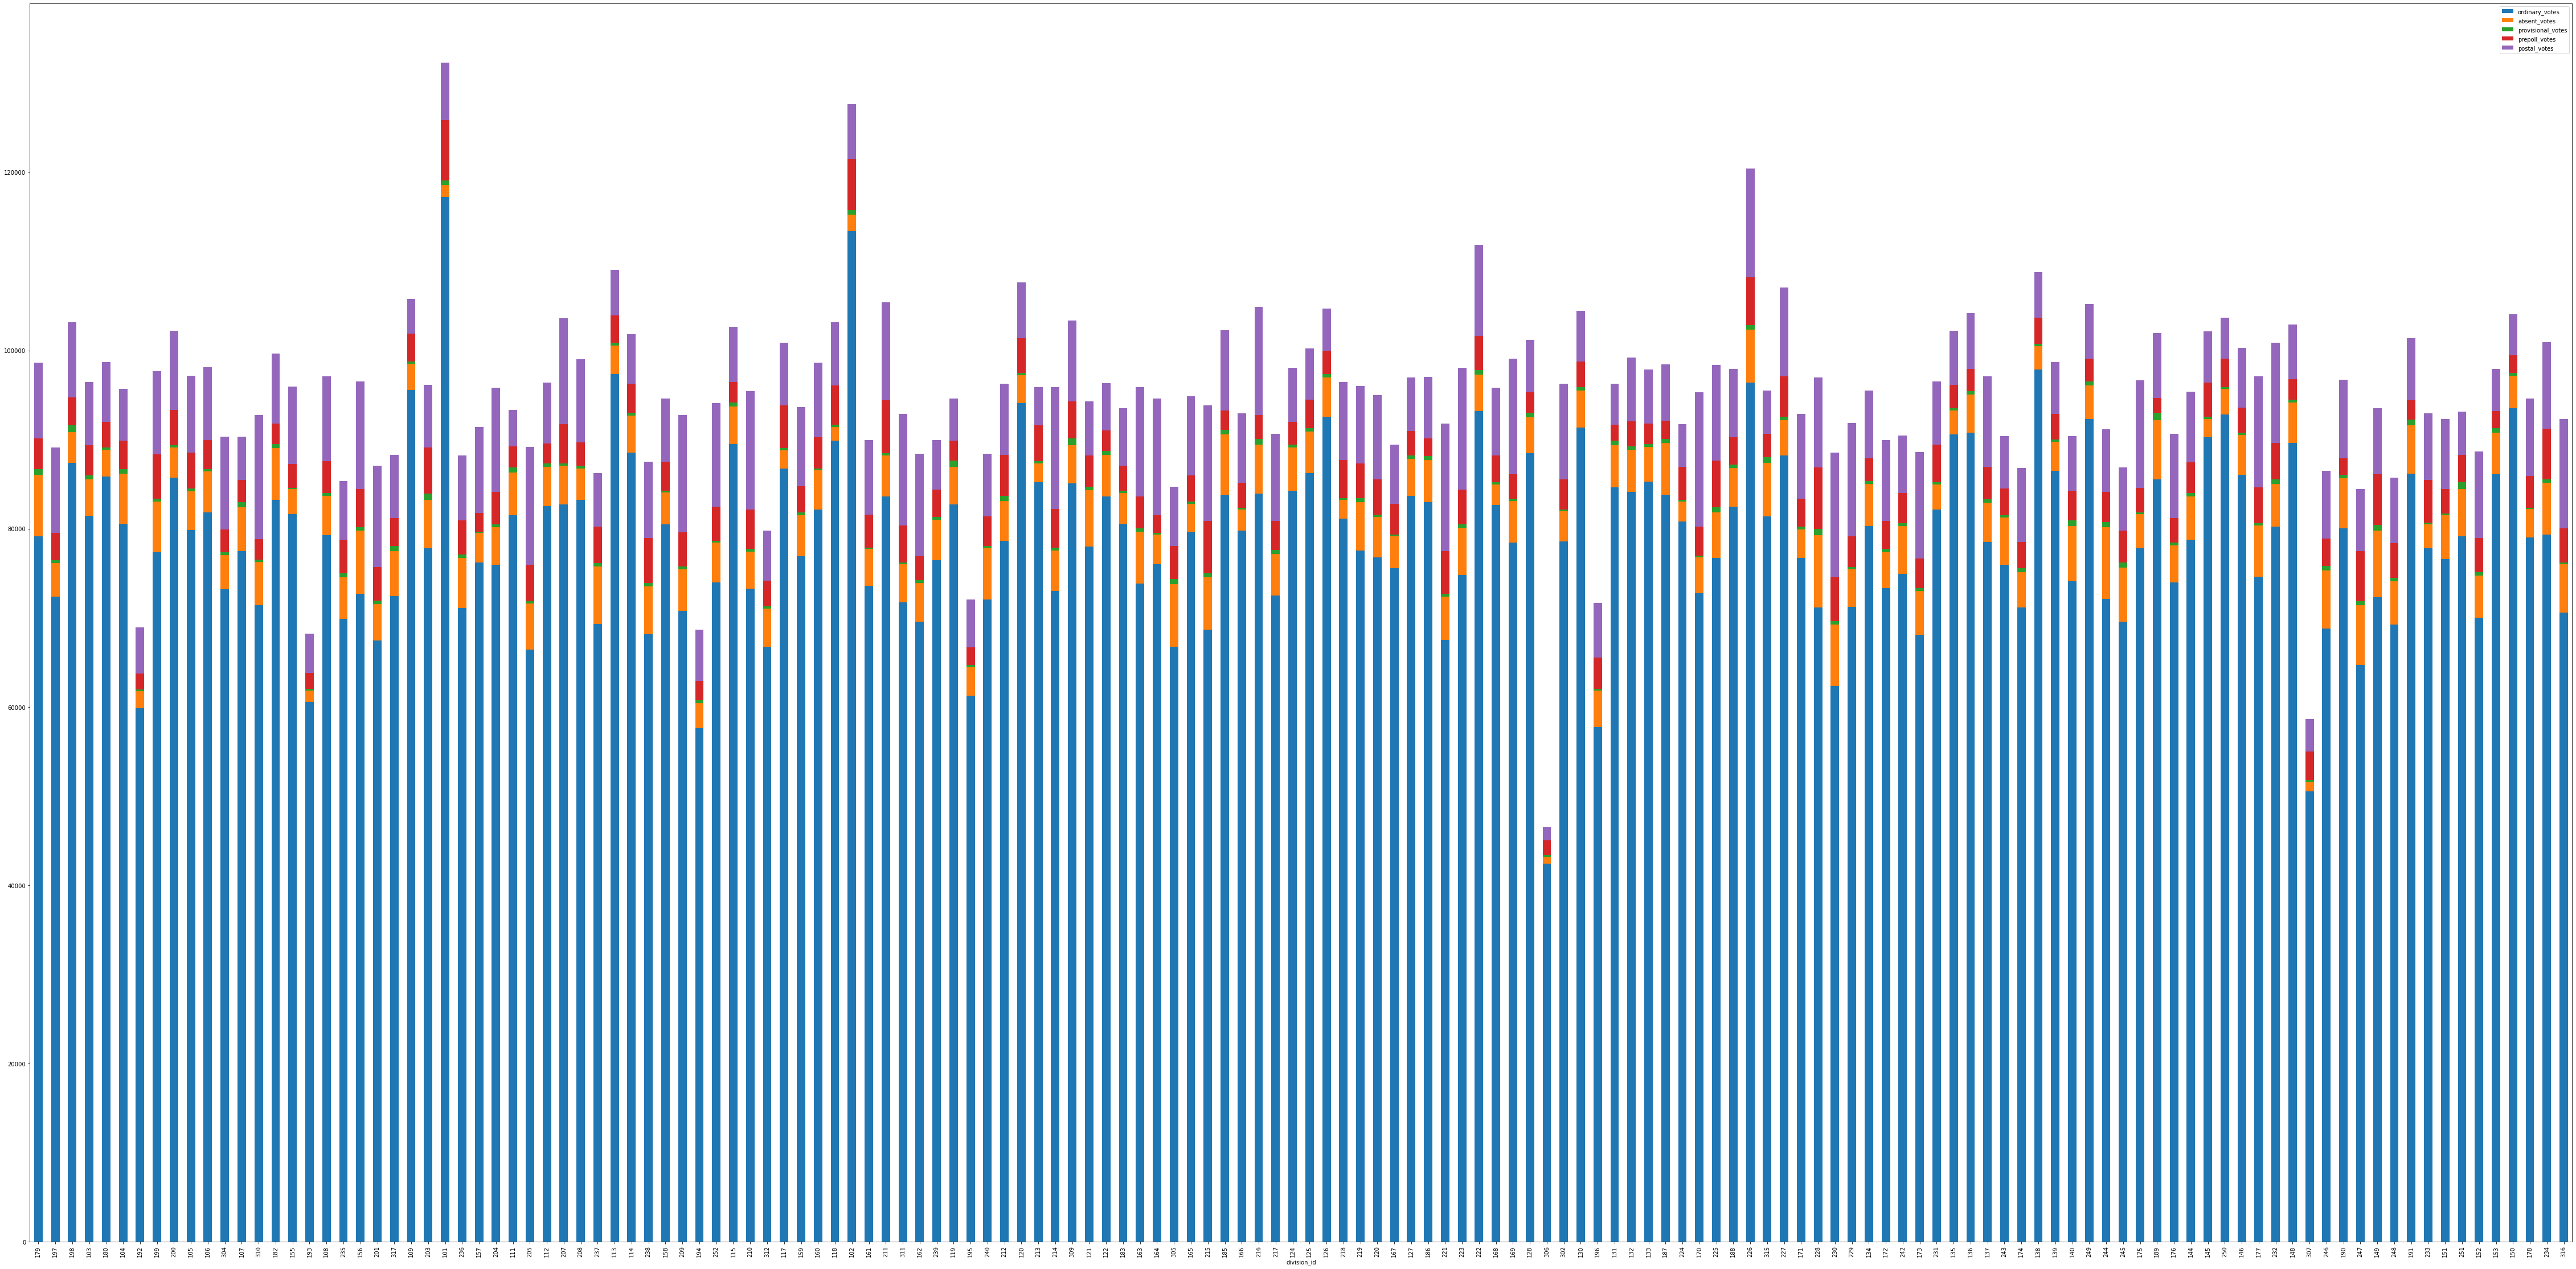

In [71]:
# stacked barchart to compare different types of votes for each electoral division
df.plot.bar(rot=90, stacked=True, figsize=(80,40))

# Exporting DataFrame to CSV

In [43]:
# export df to csv
votetypes_df.to_csv("03-output_election_vote_types/election_vote_types.csv")